In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

In [7]:
(x, x_with_nan)  = ( [8.0, 1, 2.5, 4, 28.0], [8.0, 1, 2.5, math.nan, 4, 28.0])
(y, y_with_nan)  = ( np.array(x), np.array(x_with_nan))
(z, z_with_nan)  = ( pd.Series(x), pd.Series(x_with_nan))

## (Unbiased) Sample Variance
 Quantifies how far the data points are from the sample mean

$s^2=\frac{1}{N-1} \sum_{i=0}^{N-1}(x_{i}-\bar{x})^2$ where $N$ is the number of observations

In [3]:
def svariance(x):
    n=len(x)
    mean_= sum(x)/n
    return( sum( (item - mean_)**2 for item in x)/ (n-1) )   # To calculate population variance, use n instead of (n-1)

In [8]:
variance(x)

123.19999999999999

In [9]:
variance(x_with_nan)

nan

In [13]:
# Using Statistics package
statistics.variance(x), statistics.variance(x_with_nan)

(123.2, nan)

In [21]:
# To calculate population variance
statistics.pvariance(x), statistics.pvariance(x_with_nan)

(98.56, nan)

In [15]:
# NumPy - We can use either function or method. Use ddof=0 (Which is default) to calculate population variance.
np.var(y, ddof=1)   # y.var(ddof=1)

123.19999999999999

In [16]:
np.var(y_with_nan, ddof=1) 

nan

In [18]:
# To ignore nan values
np.nanvar(y_with_nan, ddof=1)

123.19999999999999

In [19]:
# Pandas - Ignores nan values by default. Use the optional parameter skipna to change it.
z.var(ddof=1) # default value of ddof is 1

123.19999999999999

In [20]:
z_with_nan.var()

123.19999999999999

## Sample Standard deviation
Positive square root of the sample variance

In [4]:
def sstddev(x):
    n=len(x)
    mean_= sum(x)/n
    return( (sum( (item - mean_)**2 for item in x)/ (n-1) )**0.5)

In [5]:
sstddev(x)

11.099549540409285

In [6]:
sstddev(x_with_nan)

nan

In [9]:
# Statistics package
statistics.stdev(x), statistics.stdev(x_with_nan)

(11.099549540409287, nan)

In [10]:
# To calculate population variance
statistics.pstdev(x), statistics.pstdev(x_with_nan)

(9.927738916792686, nan)

In [12]:
# NumPy
np.std(y, ddof=1)   # can use y.std(ddof=1)

11.099549540409285

In [13]:
np.std(y_with_nan, ddof=1)

nan

In [14]:
np.nanstd(y_with_nan, ddof=1)

11.099549540409285

In [17]:
# Pandas
z.std(ddof=1)

11.099549540409285

In [18]:
z_with_nan.std(ddof=1)

11.099549540409285

## Sample Skewness

The sample skewness measures the asymmetry of a data set $s$ with $n$ elements

In [5]:
def sskewness(x):
    n=len(x)
    mean_= sum(x)/n
    std_= sstddev(x)
    skew_= sum( (i-mean_)**3 for i in x ) * (n/((n-1)*(n-2)*std_**3))
    return (skew_)

In [7]:
data=[8.0, 1, 2.5, 4, 28.0]
sskewness(data)

1.9470432273905929

The skewness is positive, so $x$ has a right-side tail.

In [9]:
(y, y_with_nan)

(array([ 8. ,  1. ,  2.5,  4. , 28. ]),
 array([ 8. ,  1. ,  2.5,  nan,  4. , 28. ]))

In [14]:
# SciPy
scipy.stats.skew(y, bias=False)

1.9470432273905927

The parameter bias is set to False to enable the corrections for statistical bias (Correction is enabled). 
The optional parameter nan_policy can take the values 'propagate', 'raise', or 'omit'. 
It allows you to control how you’ll handle nan values.

In [16]:
float(scipy.stats.skew(y_with_nan, bias=False, nan_policy='omit'))

1.9470432273905927

In [17]:
# Pandas
z

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64

In [18]:
z.skew()

1.9470432273905924

In [19]:
z_with_nan #ignores nan values

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64

In [20]:
z_with_nan.skew()

1.9470432273905924

## Sample Percentiles

In [5]:
(x, x_with_nan)  = ([-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0], 
                    [-5. , -1.1,  np.nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])
(y, y_with_nan)  = ( np.array(x), np.array(x_with_nan))
(z, z_with_nan)  = ( pd.Series(x), pd.Series(x_with_nan))

The sample $p$ percentile is the element $x$ in the dataset (it could be an element that is not in the data set as well) 
such that: <br>
Percent of elements in the data set below or equal to $x$ is greater than or equal to $p$.<br>
Percent of elements in the data set above or equal to $x$ is greater than or equal to $(100-p)$.

In [6]:
np.percentile(y,40)  #Second argument specifies the percentile. It can be any number in [0,100]

3.200000000000001

In [20]:
np.percentile(np.array([15, 20, 35, 35, 50]),40)

29.0

 40% of the elements in the given data set are below or equal to 3.2

In [47]:
np.percentile(y, [25,50,75])
#This returns an array of quartiles

array([ 0.1,  8. , 21. ])

In [48]:
# 50th percentile and the sample median are the same
np.median(y)

8.0

In [49]:
# To ignore null values
np.nanpercentile(y_with_nan, [25,50,75])

array([ 0.1,  8. , 21. ])

In [50]:
# We can also use np.quantile()
np.quantile(y,[0.25, 0.50, 0.75])  #Equivalent to np.percentile with only difference in the scale of the second argument.

array([ 0.1,  8. , 21. ])

In [51]:
np.nanquantile(y_with_nan,[0.25, 0.50, 0.75]) 

array([ 0.1,  8. , 21. ])

In [52]:
# Using Pandas
z

0    -5.0
1    -1.1
2     0.1
3     2.0
4     8.0
5    12.8
6    21.0
7    25.8
8    41.0
dtype: float64

In [53]:
z.quantile(0.50)

8.0

In [54]:
z.quantile([0.25,0.5,0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [55]:
# By default, ignores null
z_with_nan.quantile([0.25,0.5,0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Ranges
The range of data is the difference between the maximum and minimum element in the dataset.

In [56]:
# Using the Python's built-in function
max(x)-min(x)

46.0

In [57]:
# Using NumPy
np.max(y)-np.min(y)    #Methods can also be used y.max()-y.min()

46.0

In [59]:
# To ignore null values
np.nanmax(y_with_nan)-np.nanmin(y_with_nan)

46.0

In [20]:
np.ptp(x)

46.0

In [60]:
# Numpy has a special function - Peak to Peak
np.ptp(y), np.ptp(y_with_nan)

(46.0, nan)

In [61]:
# For Pandas object:
np.ptp(z), np.ptp(z_with_nan)

(46.0, nan)

In [62]:
# Using Pandas
z.max()-z.min()

46.0

In [63]:
z_with_nan.max()-z_with_nan.min()

46.0

## Interquartile Range
The interquartile range is the difference between the first and third quartile.

In [24]:
#Using Numpy
quartiles = np.percentile(y,[25,75])
quartiles[1]-quartiles[0]

15.0

In [68]:
# Using pandas
quartiles = z.quantile([0.25,0.75])
quartiles[0.75]-quartiles[0.25]

20.9

## Summary of Descriptive Statistics

In [70]:
# Using SciPy
scipy.stats.describe(y_with_nan, ddof=1, bias=False, nan_policy='omit')

DescribeResult(nobs=9, minmax=(masked_array(data=-5.,
             mask=False,
       fill_value=1e+20), masked_array(data=41.,
             mask=False,
       fill_value=1e+20)), mean=11.622222222222222, variance=228.75194444444446, skewness=masked_array(data=0.92490431,
             mask=False,
       fill_value=1e+20), kurtosis=0.14770623629658886)

In [73]:
result=scipy.stats.describe(y, ddof=1, bias=False, nan_policy='omit')
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

First argument: Data set. The argument can be a NumPy array, list, tuple, or similar data structure.<br>
ddof: Default value is 1. Only matters to calculate the variance.<br>
bias=False: To force correcting the skewness and kurtosis for statistical bias.

In [77]:
result.nobs, result.minmax[0], result.minmax[1], result.mean, result.variance, result.skewness, result.kurtosis

(9,
 -5.0,
 41.0,
 11.622222222222222,
 228.75194444444446,
 0.9249043136685094,
 0.14770623629658886)

In [82]:
# Using Pandas: Series objects have the method .describe() which returns a new series
result = z_with_nan.describe(percentiles=[0.25, 0.40, 0.5, 0.75])
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
40%       3.200000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [83]:
result['25%'], result['50%'], result['75%']

(0.1, 8.0, 21.0)

### Box Plot

In [66]:
x = np.array([105,221,183,186,121,181,180,143,97,154,153,174,120,168,167,141,245,228,174,
              199,181,158,176,110,163,131,154,115,160,208,158,133,207,180,190,193,194,133,
              156,123,134,178,76,167,184,135,229,146,218,157,101,171,165,172,158,169,199,
              151,142,163,145,171,148,158,160,175,149,87,160,237,150,135,196,201,200,176,150,170,118,149])

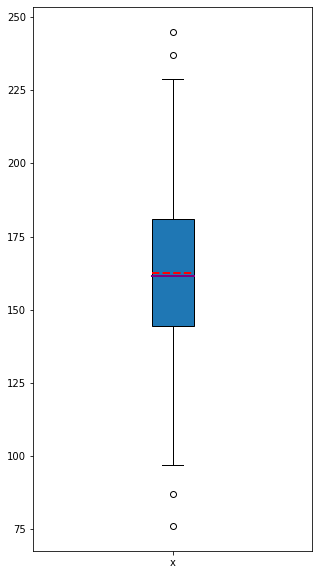

In [64]:
# Plot distribution of the data
#%matplotlib qt
%matplotlib inline
fig, ax = plt.subplots(figsize=(5,10))
ax.boxplot((x), vert=True, showmeans=True, meanline=True,
           labels=('x'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'});   #Mean is the dashed line

In [62]:
q1 = np.percentile(x,25)
q2 = np.percentile(x,50)
q3 = np.percentile(x,75)
iqr = q3 - q1
lwhis = q1 - (1.5*iqr)
uwhis = q3 + (1.5*iqr)
lcap = np.min(x[(x>=lwhis) & (x<=q1)])
ucap = np.max(x[(x>=q3) & (x<=uwhis)])
loutliers = x[x<lwhis_a]
uoutliers = x[x>uwhis_a]

In [63]:
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',np.percentile(x,75))
print('Interquartile Range:',iqr)
print('Lower Whisker:',lcap)
print('Upper Whisker:',ucap)
print('Lower Outliers:',loutliers)
print('Upper Outliers:',uoutliers)

Q1: 144.5
Q2: 161.5
Q3: 181.0
Interquartile Range: 36.5
Lower Whisker: 97
Upper Whisker: 229
Lower Outliers: [76 87]
Upper Outliers: [245 237]


## References:
1. Python Statistics Fundamentals: How to Describe Your Data - https://realpython.com/python-statistics/#measures-of-correlation-between-pairs-of-data
2. NPTEL Course on Data Analytics with Python by Prof. Ramesh Anbanandam - https://nptel.ac.in/courses/106/107/106107220/